# Pre-process data: 

This notebook takes the csv files with ERF data (historical and scenario) and converts them into an xarray. 

Notes:
- Historical emissions are used up until 2019.
- After this the SSPs are used which results in a jump in ERF because these are not harmonized for 2019.  


## UPDATE:

- Update HFCs, figures etc
- new figures

In [1]:
from ar6_ch6_rcmipfigs import constants

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas as pd

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in


### Define output paths

In [2]:
from ar6_ch6_rcmipfigs.constants import OUTPUT_DATA_DIR

SAVEPATH_DATASET = OUTPUT_DATA_DIR / 'ERF_data.nc'
# just minorGHGs_data here
SAVEPATH_DATASET_minor = OUTPUT_DATA_DIR / 'ERF_minorGHGs_data.nc'
SAVEPATH_DATASET

PosixPath('/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_out/ERF_data.nc')

## Load data:

Data for ERF historical period:

In [3]:
path_AR_hist = constants.INPUT_DATA_DIR /'AR6_ERF_1750-2019.csv'
path_AR_hist_minorGHG = constants.INPUT_DATA_DIR /'AR6_ERF_minorGHGs_1750-2019.csv'
# use historical up to 2019:
use_hist_to_year = 2019



df_hist = pd.read_csv(path_AR_hist, index_col=0).copy()
df_hist_minor_GHG = pd.read_csv(path_AR_hist_minorGHG, index_col=0).copy()
df_hist.columns

Index(['co2', 'ch4', 'n2o', 'other_wmghg', 'o3', 'h2o_stratospheric',
       'contrails', 'aerosol-radiation_interactions',
       'aerosol-cloud_interactions', 'bc_on_snow', 'land_use', 'volcanic',
       'solar', 'nonco2_wmghg', 'aerosol', 'chapter2_other_anthro',
       'total_anthropogenic', 'total_natural', 'total'],
      dtype='object')

Find SSP files:

In [4]:
path_ssps = constants.INPUT_DATA_DIR / 'SSPs'
paths = path_ssps.glob('*')  # '^(minor).)*$')
files = [x for x in paths if x.is_file()]
files

[PosixPath('/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp534-over_1750-2500.csv'),
 PosixPath('/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp334_1750-2500.csv'),
 PosixPath('/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp370-lowNTCF-gidden_minorGHGs_1750-2500.csv'),
 PosixPath('/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp119_minorGHGs_1750-2500.csv'),
 PosixPath('/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp370_minorGHGs_1750-2500.csv'),
 PosixPath('/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp434_minorGHGs_1750-2500.csv'),
 PosixPath('/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp119_1750-2500.csv'),
 PosixPath('/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/

Read all SSP files:

In [5]:
ERFs = {}
ERFs_minor = {}
nms = []
for file in files:
    fn = file.name  # filename

    _ls = fn.split('_')  # [1]
    nm = _ls[1]
    print(nm)
    print(file)
    if 'minorGHGs' in fn:
        ERFs_minor[nm] = pd.read_csv(file, index_col=0).copy()
    else:
        ERFs[nm] = pd.read_csv(file, index_col=0).copy()
    nms.append(nm)

ssp534-over
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp534-over_1750-2500.csv
ssp334
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp334_1750-2500.csv
ssp370-lowNTCF-gidden
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp370-lowNTCF-gidden_minorGHGs_1750-2500.csv
ssp119
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp119_minorGHGs_1750-2500.csv
ssp370
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp370_minorGHGs_1750-2500.csv
ssp434
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp434_minorGHGs_1750-2500.csv
ssp119
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp119_1750-2500.csv
ssp460
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp460_1750-2500.csv
ssp585
/home/sar

## Replace years up to 2019 by historical ERF

#### Controle plot before:


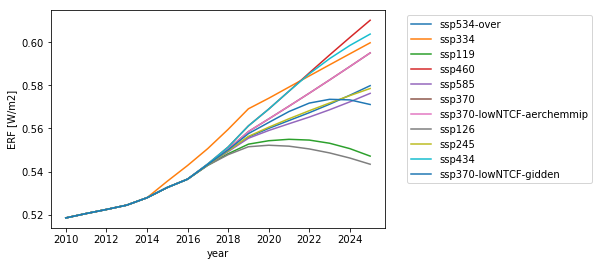

In [6]:
for scn in ERFs.keys():
    ERFs[scn].loc[2010:2025]['ch4'].plot(label=scn)
    
plt.ylabel('ERF [W/m2]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

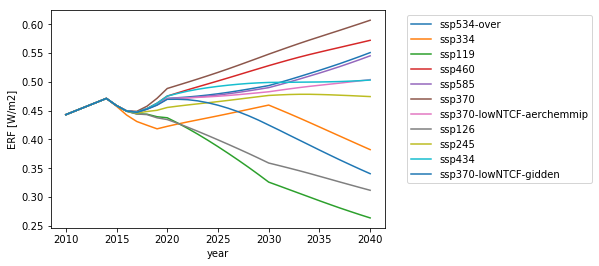

In [7]:
for scn in ERFs.keys():
    ERFs[scn].loc[2010:2040]['o3'].plot(label=scn)
    
plt.ylabel('ERF [W/m2]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

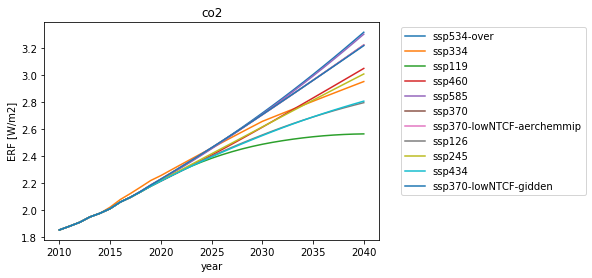

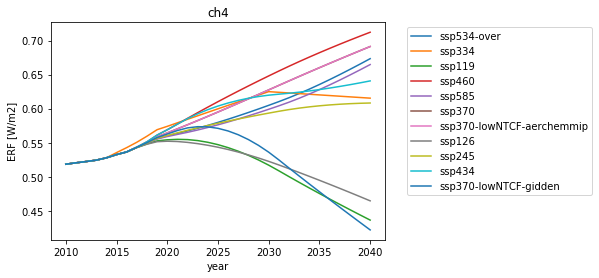

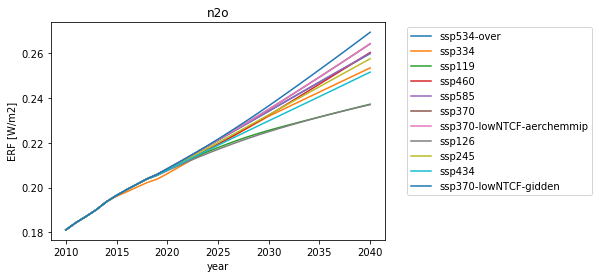

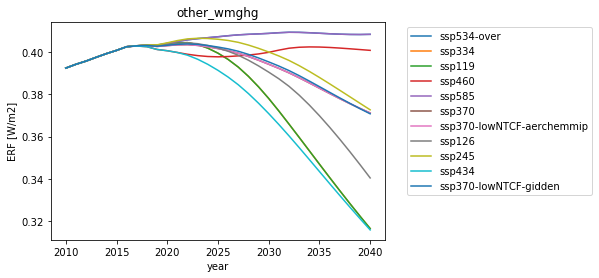

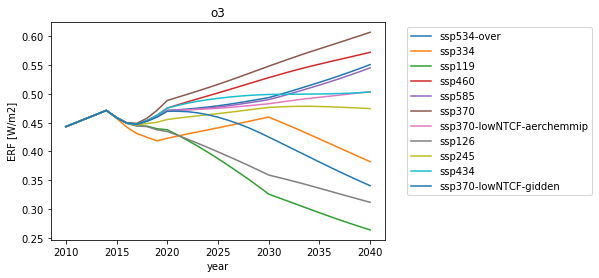

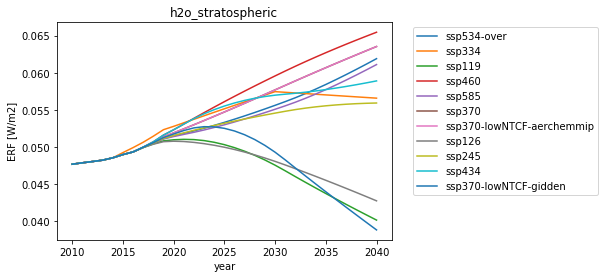

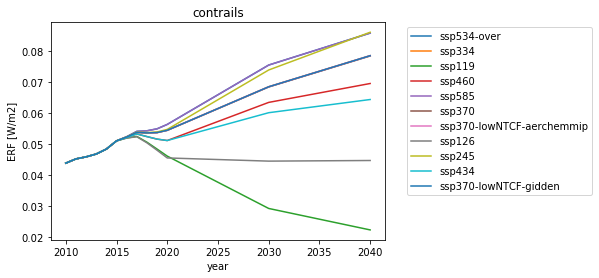

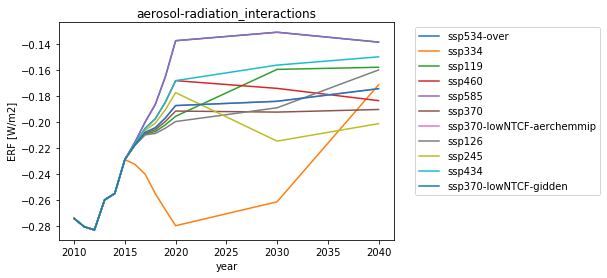

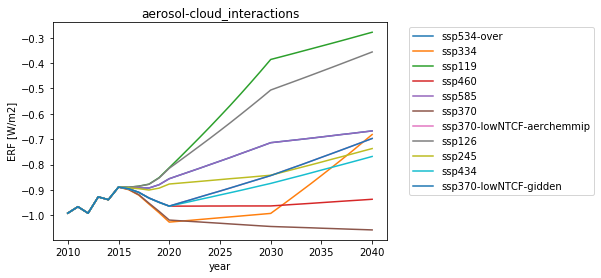

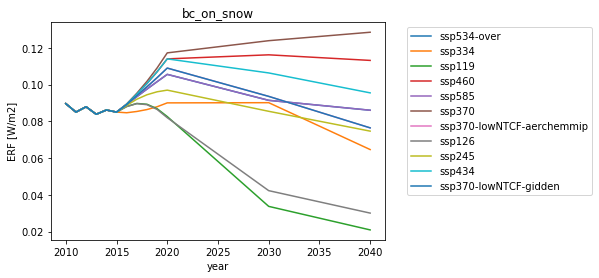

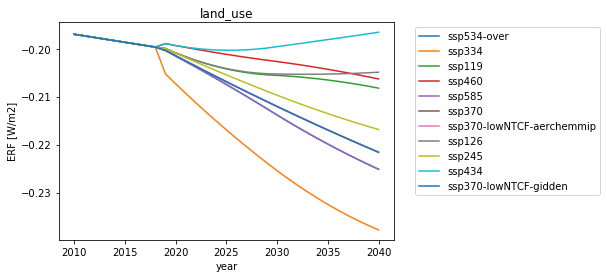

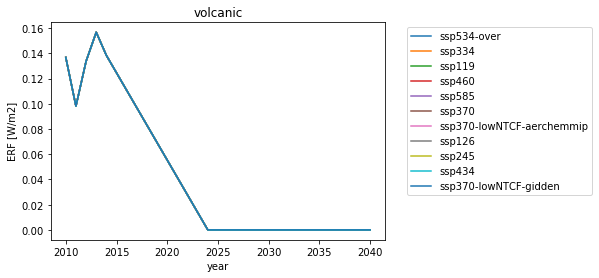

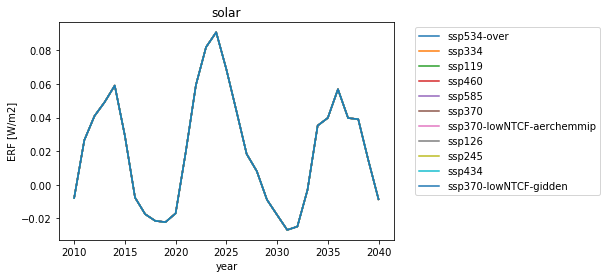

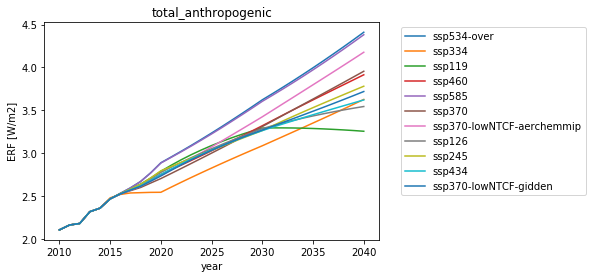

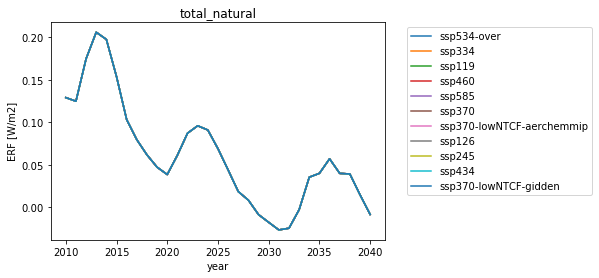

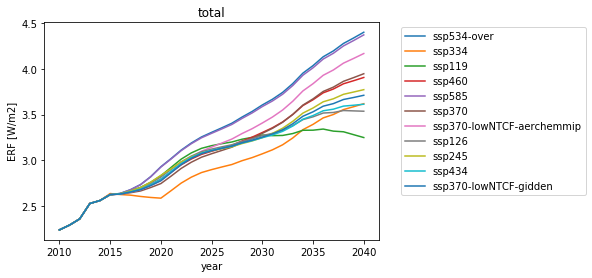

In [8]:
for var in ERFs['ssp119'].columns:
    for scn in ERFs.keys():
        ERFs[scn].loc[2010:2040][var].plot(label=scn)
        
    plt.ylabel('ERF [W/m2]')
    plt.title(var)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

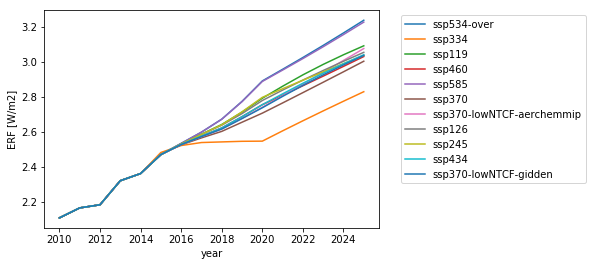

In [9]:
for scn in ERFs.keys():
    ERFs[scn].loc[2010:2025]['total_anthropogenic'].plot(label=scn)
    
plt.ylabel('ERF [W/m2]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

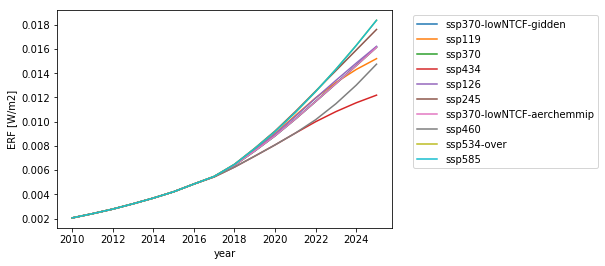

In [10]:
for scn in ERFs_minor.keys():
    ERFs_minor[scn].loc[2010:2025]['HFC-125'].plot(label=scn)
    
plt.ylabel('ERF [W/m2]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [11]:
cols = ERFs['ssp119'].columns
print(cols)
cols_minorGHG = ERFs_minor['ssp119'].columns
print(cols_minorGHG)

Index(['co2', 'ch4', 'n2o', 'other_wmghg', 'o3', 'h2o_stratospheric',
       'contrails', 'aerosol-radiation_interactions',
       'aerosol-cloud_interactions', 'bc_on_snow', 'land_use', 'volcanic',
       'solar', 'total_anthropogenic', 'total_natural', 'total'],
      dtype='object')
Index(['HFC-134a', 'HFC-23', 'HFC-32', 'HFC-125', 'HFC-143a', 'HFC-152a',
       'HFC-227ea', 'HFC-236fa', 'HFC-245fa', 'HFC-365mfc', 'HFC-43-10mee',
       'NF3', 'SF6', 'SO2F2', 'CF4', 'C2F6', 'C3F8', 'c-C4F8', 'CFC-12',
       'CFC-11', 'CFC-113', 'CFC-114', 'CFC-115', 'CFC-13', 'HCFC-22',
       'HCFC-141b', 'HCFC-142b', 'CH3CCl3', 'CCl4', 'CH3Cl', 'CH3Br', 'CH2Cl2',
       'CHCl3', 'Halon-1211', 'Halon-1301', 'Halon-2402', 'n-C4F10', 'n-C5F12',
       'n-C6F14', 'i-C6F14', 'C7F16', 'C8F18', 'CFC-112', 'CFC-112a',
       'CFC-113a', 'CFC-114a', 'HCFC-133a', 'HCFC-31', 'HCFC-124'],
      dtype='object')


In [12]:
for scn in ERFs.keys():
    ERFs[scn].loc[1750:use_hist_to_year] = df_hist[cols].loc[1750:use_hist_to_year]   
    if scn in ERFs_minor:
        ERFs_minor[scn].loc[1750:use_hist_to_year] = df_hist_minor_GHG[cols_minorGHG].loc[1750:use_hist_to_year]

#### Controle plot after:

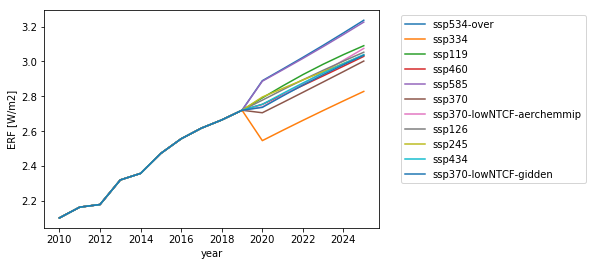

In [13]:
for scn in ERFs.keys():
    ERFs[scn].loc[2010:2025]['total_anthropogenic'].plot(label=scn)
    
plt.ylabel('ERF [W/m2]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

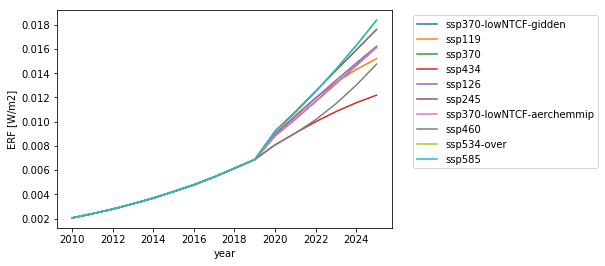

In [14]:
for scn in ERFs_minor.keys():
    ERFs_minor[scn].loc[2010:2025]['HFC-125'].plot(label=scn)
    
plt.ylabel('ERF [W/m2]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

## Pre-processing: 

### Add together aerosol forcing:

In [15]:
aero_tot = 'aerosol-total'
aero_cld = 'aerosol-cloud_interactions'
aero_rad = 'aerosol-radiation_interactions'
bc_on_snow = 'bc_on_snow'
aero_tot_wbc = 'aerosol-total-with_bc-snow'
for scn in ERFs.keys():
    # add together:
    ERFs[scn][aero_tot] = ERFs[scn][aero_cld] + ERFs[scn][aero_rad]
    ERFs[scn][aero_tot_wbc] = ERFs[scn][aero_tot]+ ERFs[scn][bc_on_snow] 

### Compute sum of HFCs

In [16]:
HFCs_name = 'HFCs'
# list of variables
ls = list(ERFs_minor['ssp370-lowNTCF-aerchemmip'].columns)
# chocose only those with HFC in them
vars_HFCs = [v for v in ls if 'HFC' in v]

vars_HFCs

['HFC-134a',
 'HFC-23',
 'HFC-32',
 'HFC-125',
 'HFC-143a',
 'HFC-152a',
 'HFC-227ea',
 'HFC-236fa',
 'HFC-245fa',
 'HFC-365mfc',
 'HFC-43-10mee']

We define SLCFs as those with a lifetime of less than 20 years, and this excludes the following:
HFC-23,HFC-125,HFC-143a,HFC-227ea,HFC-236fa



In [17]:
excluded_HFCs = ['HFC-23','HFC-236fa'] #'HFC-125','HFC-227ea','HFC-143a',

In [18]:
final_HFC_vars = [hfc for hfc in vars_HFCs if hfc not in excluded_HFCs]

In [19]:
final_HFC_vars

['HFC-134a',
 'HFC-32',
 'HFC-125',
 'HFC-143a',
 'HFC-152a',
 'HFC-227ea',
 'HFC-245fa',
 'HFC-365mfc',
 'HFC-43-10mee']

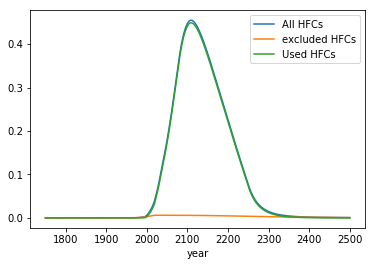

In [20]:
ERFs_minor['ssp585'][vars_HFCs].sum(axis=1).plot(label='All HFCs')
ERFs_minor['ssp585'][excluded_HFCs].sum(axis=1).plot(label='excluded HFCs')
ERFs_minor['ssp585'][final_HFC_vars].sum(axis=1).plot(label='Used HFCs')
#(ERFs_minor['ssp585'][excluded_HFCs].sum(axis=1)+ERFs_minor['ssp585'][final_HFC_vars].sum(axis=1)).plot(label='sum')
plt.legend()

In [21]:
for scn in ERFs_minor.keys():
    # sum over HFC variables
    ERFs_minor[scn][HFCs_name] = ERFs_minor[scn][final_HFC_vars].sum(axis=1)
    # add row to ERFs as well
    ERFs[scn][HFCs_name] = ERFs_minor[scn][HFCs_name]
ERFs[scn]

,co2,ch4,n2o,other_wmghg,o3,h2o_stratospheric,contrails,aerosol-radiation_interactions,aerosol-cloud_interactions,bc_on_snow,land_use,volcanic,solar,total_anthropogenic,total_natural,total,aerosol-total,aerosol-total-with_bc-snow,HFCs
year,,,,,,,,,,,,,,,,,,,
1750,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.199978,0.097590,0.000000,0.297568,0.297568,0.000000,0.000000,0.000000
1751,0.001416,0.000508,0.000074,7.958010e-10,0.000300,0.000047,0.0,0.000601,0.004674,0.000017,-0.000229,0.199990,0.079244,0.007408,0.279234,0.286642,0.005274,0.005292,0.000000
1752,0.002832,0.001016,0.000148,1.591602e-09,0.000600,0.000093,0.0,0.001247,0.007281,0.000035,-0.000458,0.199995,0.049166,0.012794,0.249161,0.261955,0.008528,0.008563,0.000000
1753,0.004247,0.001524,0.000222,2.387403e-09,0.000900,0.000140,0.0,0.000537,0.004742,0.000052,-0.000687,0.199996,0.012988,0.011676,0.212984,0.224661,0.005278,0.005331,0.000000
1754,0.005662,0.002031,0.000296,3.183204e-09,0.001200,0.000187,0.0,-0.000875,-0.002000,0.000070,-0.000916,0.199996,-0.021427,0.005655,0.178570,0.184225,-0.002874,-0.002805,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,12.020404,0.168752,0.414101,5.932631e-02,-0.057579,0.015511,0.0,-0.141513,0.025636,-0.006410,-0.220174,0.000000,0.000000,12.278054,0.000000,12.278054,-0.115878,-0.122288,0.000037
2497,12.018382,0.168662,0.414094,5.929201e-02,-0.057676,0.015503,0.0,-0.141513,0.025636,-0.006410,-0.220174,0.000000,0.000000,12.275795,0.000000,12.275795,-0.115878,-0.122288,0.000036
2498,12.016389,0.168572,0.414085,5.925787e-02,-0.057773,0.015494,0.0,-0.141513,0.025636,-0.006410,-0.220174,0.000000,0.000000,12.273563,0.000000,12.273563,-0.115878,-0.122288,0.000035


## For SSP4-3.4 HFCs, use SSP1-1.9 for HFCs

In [22]:
ssp334 ='ssp334'
ssp119 = 'ssp119'

In [23]:
ERFs[ssp334][HFCs_name] = ERFs[ssp119][HFCs_name]
ERFs_minor[ssp334] = ERFs_minor[ssp119]#[HFCs_name]

ERFs_minor[ssp334] = ERFs_minor[ssp119].copy()#.keys()

## Convert to xarray:

In [24]:
import xarray as xr


das = []
# loop over scenarios
for scn in ERFs.keys(): 
    # convert to xarray
    ds = ERFs[scn].to_xarray()  # .squeeze()
    # concatubate variables as new dimension
    da = ds.to_array('variable')
    # give scenario name
    da = da.rename(scn)

    das.append(da)

In [25]:
# let the new dimension be called scenario:
da_tot = xr.merge(das).to_array('scenario')
# rename the dataset to ERF
da_tot = da_tot.rename('ERF')
# save
da_tot.to_netcdf(SAVEPATH_DATASET)
da_tot.to_dataset()

<xarray.Dataset>
Dimensions:   (scenario: 11, variable: 19, year: 751)
Coordinates:
  * year      (year) int64 1750 1751 1752 1753 1754 ... 2496 2497 2498 2499 2500
  * variable  (variable) <U30 'co2' 'ch4' ... 'HFCs'
  * scenario  (scenario) <U25 'ssp534-over' 'ssp334' ... 'ssp370-lowNTCF-gidden'
Data variables:
    ERF       (scenario, variable, year) float64 0.0 0.001416 ... 2.392e-05

### Save minor GHGs as well:

In [26]:
import xarray as xr

das = []
for nm in nms:
    if nm not in  ERFs_minor.keys():
        continue
    ds = ERFs_minor[nm].to_xarray()  # .squeeze()
    da = ds.to_array('variable')
    da = da.rename(nm)
    das.append(da)

In [27]:
da_tot_minor = xr.merge(das).to_array('scenario')
da_tot_minor = da_tot_minor.rename('ERF')
da_tot_minor.to_netcdf(SAVEPATH_DATASET_minor)
da_tot_minor.to_dataset()

<xarray.Dataset>
Dimensions:   (scenario: 11, variable: 50, year: 751)
Coordinates:
  * year      (year) int64 1750 1751 1752 1753 1754 ... 2496 2497 2498 2499 2500
  * variable  (variable) <U12 'HFC-134a' 'HFC-23' 'HFC-32' ... 'HCFC-124' 'HFCs'
  * scenario  (scenario) <U25 'ssp534-over' ... 'ssp370-lowNTCF-aerchemmip'
Data variables:
    ERF       (scenario, variable, year) float64 0.0 0.0 ... 7.326e-05 7.239e-05

## Check:

In [28]:
da_check = xr.open_dataset(SAVEPATH_DATASET)
da_check

<xarray.Dataset>
Dimensions:   (scenario: 11, variable: 19, year: 751)
Coordinates:
  * year      (year) int64 1750 1751 1752 1753 1754 ... 2496 2497 2498 2499 2500
  * variable  (variable) object 'co2' 'ch4' ... 'HFCs'
  * scenario  (scenario) object 'ssp534-over' ... 'ssp370-lowNTCF-gidden'
Data variables:
    ERF       (scenario, variable, year) float64 ...

In [29]:
da_check.sel(scenario='ssp334', variable='HFCs')

<xarray.Dataset>
Dimensions:   (year: 751)
Coordinates:
  * year      (year) int64 1750 1751 1752 1753 1754 ... 2496 2497 2498 2499 2500
    variable  <U4 'HFCs'
    scenario  <U6 'ssp334'
Data variables:
    ERF       (year) float64 ...

In [30]:
import matplotlib.pyplot as plt

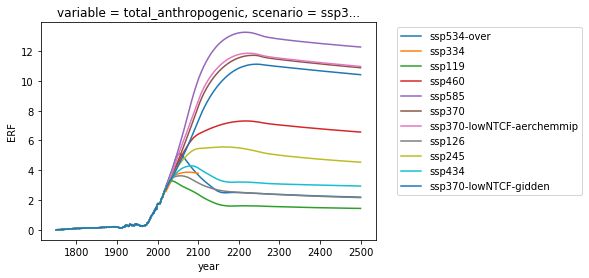

In [31]:
for scn in da_check.scenario:
    da_check.sel(variable='total_anthropogenic')['ERF'].sel(scenario=scn).plot(label=scn.values)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', )

In [32]:
SAVEPATH_DATASET

PosixPath('/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_out/ERF_data.nc')